In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(7352, 563)

In [7]:
# Classification problem - Sample Size is 50 observations per variable 
# 563 X 50 = 28150 Observations or Rows but only 7352 are there.

# High Dimensional Data - Where less number of Rows or Observations and more number of Variables or Columns.

# Dimensionality Reductin algorithms reduce the dimensionality or mubr of variables not by deleting bt combining variables into 
# components and also retain data trednd and pattern.

# Combining is based on Similarity using either covarince or correlation.

In [ ]:
# Principal Component Analysis(PCA)  is an unsupervised algorithm that converts observations of correlated/covariance matrix 
# through orthogonal transformation and newly transformed features are called principal components.

# Orthogonal Transformation - Correlated features are transformed into uncorrelated features whose correlation will be zero.

# Eigenvectors and Eigenvalues - If there is a square Matrix M and a non zero vector V, then V will be Eigen Vecotor if 
# MV is sclaer multiple of V.

# Standardization or Normalization of Data must be done before implementing PCA. Scaling must be done.
# Input of PCA is a correlation or Covariance matrix.



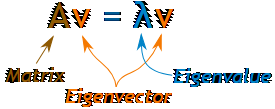

In [8]:
# How to find or decide n_components?
# 1) IF an exact amount of variance is to be retained in data after applying PCA, specify the requried amount of variance in 
#    percentage terms as a float between 0 and 1. By default PCA automatically selects the best number of components with 85%
#    of variance retained.

# 2) Plot the explained variance percentage of individual components and percentage total variance captured by all principal 
#    components. 

# 3) Uing the Scree plot which is visual representation of eigen values that defines the magnitude of eigen vectors(prin comp)

# 4) According to Kaiser's rule, it is recommeneded to keep all the components with eigenvalues greater than 1.

In [11]:
data.Activity.value_counts(dropna=False)

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [12]:
y = data.Activity
X = data.drop(['subject','Activity'], axis = 1)

In [13]:
from sklearn.decomposition import PCA

In [14]:
# 1) Typically explained varaince is to be between 95%-99%. Specify value as a float between 0 and 1. 

pca_95_variance = PCA(n_components=0.95) # 95% explained variance

In [15]:
pca_95_variance

PCA(n_components=0.95)

In [16]:
pca_95_variance.fit(X)

PCA(n_components=0.95)

In [17]:
pca_95_variance.fit(X).n_components_ # Combined 561 variables into 67 principal components

67

In [18]:
X_pca_95 = pca_95_variance.transform(X)

In [19]:
X_pca_95.shape

(7352, 67)

In [21]:
# Based on Scree plot visualization identify number of components.

pca_scree = PCA(n_components=280) # Randomly 280 as components.

In [22]:
X_pca_scree = pca_scree.fit(X)

In [24]:
# Cumulative Explained Variance Ratio

X_pca_exp_variance = np.cumsum(np.round(X_pca_scree.explained_variance_ratio_,4)*100)

<Figure size 2000x1000 with 0 Axes>

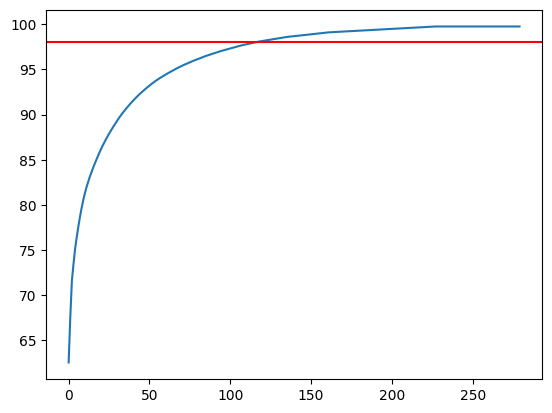

In [25]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
plt.plot(X_pca_exp_variance)
plt.axhline(y=98, color='red')
plt.show()

In [26]:
X_pca_exp_variance

array([62.55, 67.46, 71.58, 73.45, 75.14, 76.41, 77.59, 78.66, 79.63,
       80.49, 81.25, 81.92, 82.5 , 83.06, 83.56, 84.03, 84.5 , 84.93,
       85.36, 85.77, 86.16, 86.54, 86.89, 87.23, 87.56, 87.88, 88.18,
       88.47, 88.76, 89.04, 89.32, 89.58, 89.84, 90.08, 90.31, 90.53,
       90.75, 90.96, 91.17, 91.37, 91.56, 91.75, 91.93, 92.11, 92.28,
       92.44, 92.6 , 92.76, 92.91, 93.06, 93.21, 93.35, 93.49, 93.62,
       93.75, 93.87, 93.99, 94.1 , 94.21, 94.32, 94.43, 94.53, 94.63,
       94.73, 94.83, 94.93, 95.03, 95.12, 95.21, 95.3 , 95.39, 95.47,
       95.55, 95.63, 95.71, 95.79, 95.87, 95.94, 96.01, 96.08, 96.15,
       96.22, 96.29, 96.36, 96.43, 96.49, 96.55, 96.61, 96.67, 96.73,
       96.79, 96.85, 96.91, 96.97, 97.02, 97.07, 97.12, 97.17, 97.22,
       97.27, 97.32, 97.37, 97.42, 97.47, 97.52, 97.57, 97.62, 97.66,
       97.7 , 97.74, 97.78, 97.82, 97.86, 97.9 , 97.94, 97.98, 98.02,
       98.06, 98.09, 98.12, 98.15, 98.18, 98.21, 98.24, 98.27, 98.3 ,
       98.33, 98.36,

In [31]:
# Final Components will be 99% variance.

X_pca_final = PCA(n_components=0.95)

In [32]:
X_pca_final = X_pca_final.fit(X)

In [33]:
X_pca_final_95 = X_pca_final.transform(X)

In [34]:
X_pca_final_95.shape

(7352, 67)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
lr = LabelEncoder()

In [38]:
y = lr.fit_transform(y)

In [48]:
from sklearn.linear_model import LogisticRegression

In [68]:
reg = LogisticRegression(multi_class="multinomial", max_iter=5000)

In [55]:
regmodel = reg.fit(X,y)

In [56]:
regmodel.score(X,y)

0.9925190424374319

In [59]:
regmodel_predict = regmodel.predict(X)

In [58]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y,regmodel_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1407
           1       0.98      0.98      0.98      1286
           2       0.98      0.98      0.98      1374
           3       1.00      1.00      1.00      1226
           4       1.00      1.00      1.00       986
           5       1.00      1.00      1.00      1073

    accuracy                           0.99      7352
   macro avg       0.99      0.99      0.99      7352
weighted avg       0.99      0.99      0.99      7352



In [61]:
from sklearn.model_selection import cross_val_score

In [69]:
print(cross_val_score(regmodel,X,y))

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.92590075 0.8946295  0.9462585  0.95102041 0.96734694]


In [71]:
np.mean([0.92590075 ,0.8946295 , 0.9462585  ,0.95102041, 0.96734694])

0.9370312199999999

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt = DecisionTreeClassifier(max_depth=8)

In [80]:
dtmodel = dt.fit(X,y)

In [81]:
dtmodel.score(X,y)

0.9733405875952121

In [91]:
dtmodel_pred = dtmodel.predict(X)

In [93]:
print(classification_report(y,dtmodel_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1407
           1       0.97      0.96      0.96      1286
           2       0.96      0.97      0.97      1374
           3       0.97      0.97      0.97      1226
           4       0.98      0.97      0.98       986
           5       0.95      0.96      0.96      1073

    accuracy                           0.97      7352
   macro avg       0.97      0.97      0.97      7352
weighted avg       0.97      0.97      0.97      7352



In [82]:
print(cross_val_score(dtmodel,X,y))

[0.8171312  0.82460911 0.86462585 0.87482993 0.89183673]


In [83]:
np.mean([0.8171312 ,0.82460911 ,0.86462585, 0.87482993, 0.89183673])

0.8546065639999998

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
RF = RandomForestClassifier(n_estimators=1000)

In [86]:
rfmodel = RF.fit(X,y)

In [87]:
rfmodel.score(X,y)

1.0

In [94]:
rfmodel_pred = rfmodel.predict(X)

In [95]:
print(classification_report(y,rfmodel_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1407
           1       1.00      1.00      1.00      1286
           2       1.00      1.00      1.00      1374
           3       1.00      1.00      1.00      1226
           4       1.00      1.00      1.00       986
           5       1.00      1.00      1.00      1073

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352



In [89]:
print(cross_val_score(rfmodel,X,y))

[0.91434398 0.9014276  0.91088435 0.92585034 0.9537415 ]


In [90]:
np.mean([0.91434398, 0.9014276  ,0.91088435 ,0.92585034, 0.9537415 ])

0.9212495539999999